# Recurrent Neural Networks

calcular o preço das ações do google

In [1]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1198, 60, 1)

In [5]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GRU
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first GRU layer and some Dropout regularisation
regressor.add(GRU(units = 15, return_sequences = True, input_shape = (X_train.shape[1], 1)))


# Adding a fourth GRU layer and some Dropout regularisation
regressor.add(GRU(units = 5))
#regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [6]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
38/38 [==============================] - 4s 26ms/step - loss: 0.0398
Epoch 2/50
38/38 [==============================] - 1s 27ms/step - loss: 0.0037
Epoch 3/50
38/38 [==============================] - 1s 27ms/step - loss: 9.3845e-04
Epoch 4/50
38/38 [==============================] - 1s 27ms/step - loss: 5.4949e-04
Epoch 5/50
38/38 [==============================] - 1s 28ms/step - loss: 5.2952e-04
Epoch 6/50
38/38 [==============================] - 1s 28ms/step - loss: 4.7265e-04
Epoch 7/50
38/38 [==============================] - 1s 28ms/step - loss: 5.0397e-04
Epoch 8/50
38/38 [==============================] - 1s 28ms/step - loss: 3.9777e-04
Epoch 9/50
38/38 [==============================] - 1s 27ms/step - loss: 4.7055e-04
Epoch 10/50
38/38 [==============================] - 1s 27ms/step - loss: 3.9595e-04
Epoch 11/50
38/38 [==============================] - 1s 28ms/step - loss: 4.4860e-04
Epoch 12/50
38/38 [==============================] - 1s 28ms/step - loss: 3.8797e-

In [7]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [8]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
inputs.shape

(80, 1)

In [9]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(20, 60, 1)

In [10]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price

array([[785.23145],
       [782.2182 ],
       [789.10736],
       [789.23413],
       [795.78503],
       [805.83905],
       [808.81946],
       [806.52344],
       [807.3911 ],
       [808.0862 ],
       [807.9318 ],
       [806.91675],
       [806.20966],
       [807.53455],
       [808.2029 ],
       [819.73035],
       [827.9472 ],
       [835.13525],
       [833.84937],
       [817.8576 ]], dtype=float32)

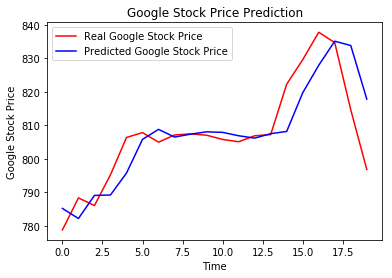

In [11]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

##### FIM